This notebook explores the final datasets and creates plots.
Make sure to correct the file paths if needed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the files. Make sure to correct the file paths if needed.

df_train = pd.read_csv("data/final/train_split.csv")
df_test_1 = pd.read_csv("data/final/test_split_1.csv")

# Load original human data sets
df_human_social = pd.read_csv("data/original/social_media.csv")
df_human_news = pd.read_csv("data/original/news.csv")
df_human_poems = pd.read_csv("data/original/poems.csv")

In [ ]:
# Drop 'title' column from the news and poems dfs
df_human_news = df_human_news.drop(columns=['title'])
df_human_poems = df_human_poems.drop(columns=['title'])

# Create a joint df
df_human = pd.concat([df_human_social, df_human_news, df_human_poems], ignore_index=True)
df_human.head()

,texts,source,word_counts,genre
0,"Кстати, как неожиданно КПРФ стало не все равно...",vk,14,social
1,"можно и по-другому сказать: ""убогая клоунада"" ...",vk,36,social
2,Вот он тонкий незаметный ход против России. Зю...,vk,23,social
3,просто в этом паблике раньше подобных постов н...,vk,21,social
4,Это не КПРФ - это цирк. Коммунизм - это совсем...,vk,12,social


In [ ]:
df_human['genre'].value_counts()

,count
genre,
social,632216
news,20801
poems,19302


Let's start by inspecting the final train and test splits.

In [ ]:
print(len(df_train))
print(len(df_test_1))

2400
600


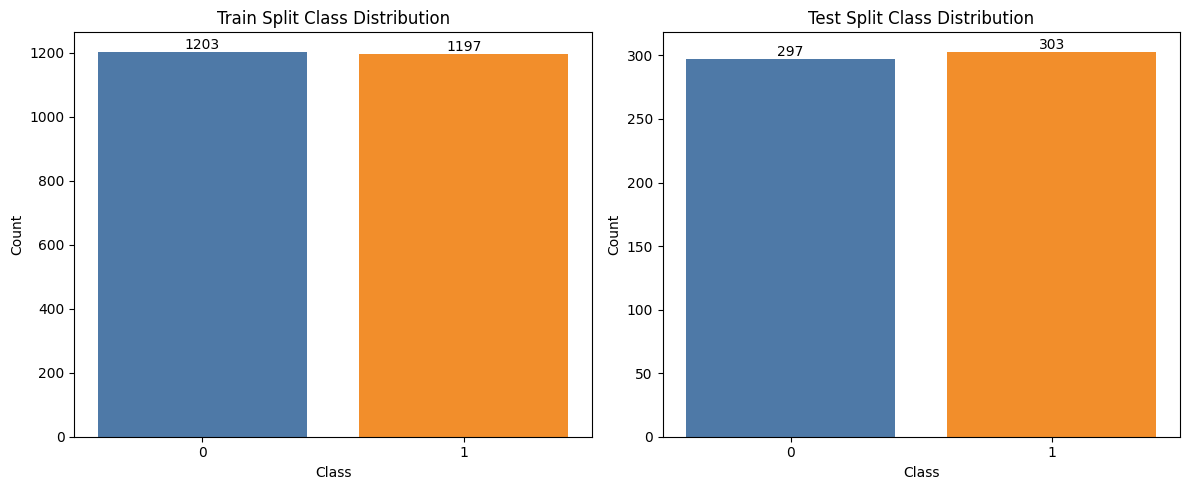

In [ ]:
# Plot Class Distribution in train and test splits
# Define color scheme
color_map = {0: '#4E79A7', 1: '#F28E2B'}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot df_train
train_counts = df_train['class'].value_counts().sort_index()
train_colors = [color_map[c] for c in train_counts.index]
bars_train = axes[0].bar(train_counts.index.astype(str), train_counts.values, color=train_colors)
axes[0].set_title('Train Split Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

for bar in bars_train:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Plot df_test_1
test_counts = df_test_1['class'].value_counts().sort_index()
test_colors = [color_map[c] for c in test_counts.index]
bars_test = axes[1].bar(test_counts.index.astype(str), test_counts.values, color=test_colors)
axes[1].set_title('Test Split Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

for bar in bars_test:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.tight_layout()

# Save to file if needed
#plt.savefig("plots/class_distribution_per_split.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_train['genre'].value_counts()

,count
genre,
poems,800
news,800
social,800


In [ ]:
df_test_1['genre'].value_counts()

,count
genre,
social,200
poems,200
news,200


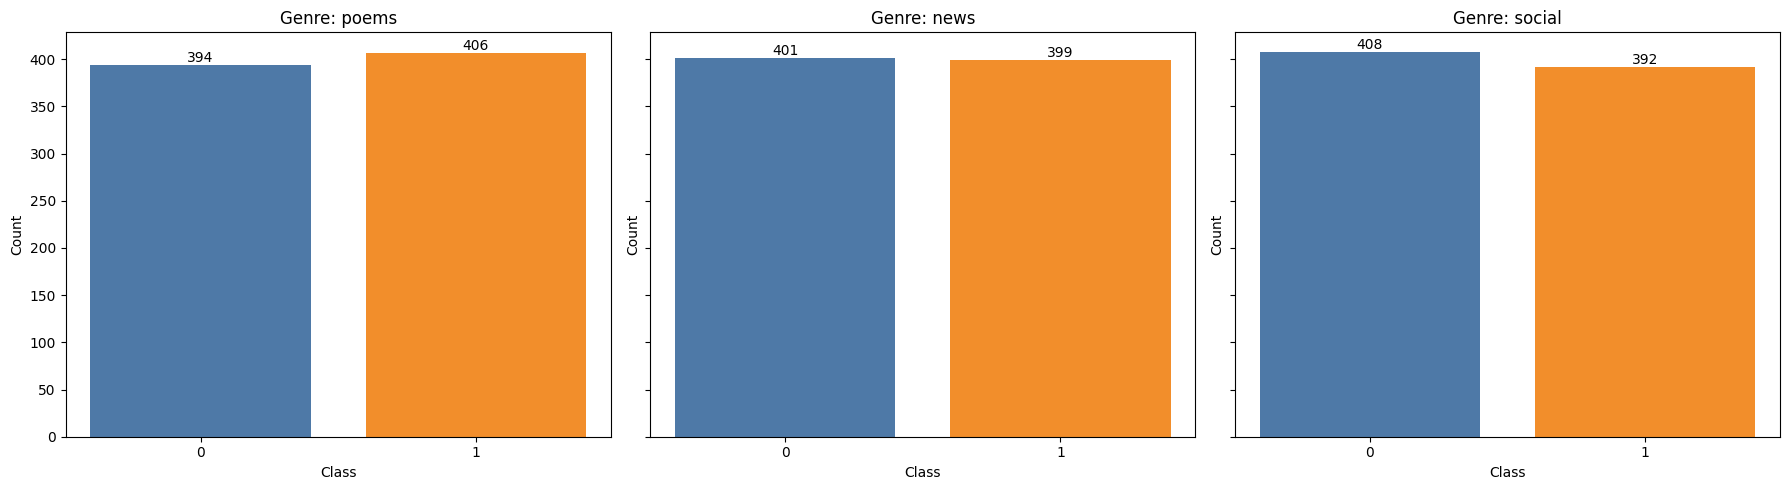

In [ ]:
# Plot Class distribution by genre in the train split
unique_genres = df_train['genre'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, genre in zip(axes, unique_genres):
    genre_df = df_train[df_train['genre'] == genre]

    class_counts = genre_df['class'].value_counts().sort_index()
    class_counts = class_counts.reindex([0, 1], fill_value=0)

    # Plot
    bars = ax.bar(class_counts.index.astype(str),
                  class_counts.values,
                  color=[color_map[c] for c in class_counts.index])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, str(height),
                ha='center', va='bottom')

    ax.set_title(f"Genre: {genre}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

plt.tight_layout()

# Save to file if needed
#plt.savefig("plots/genre_class_distribution_train_split.png", dpi=300, bbox_inches='tight')
plt.show()

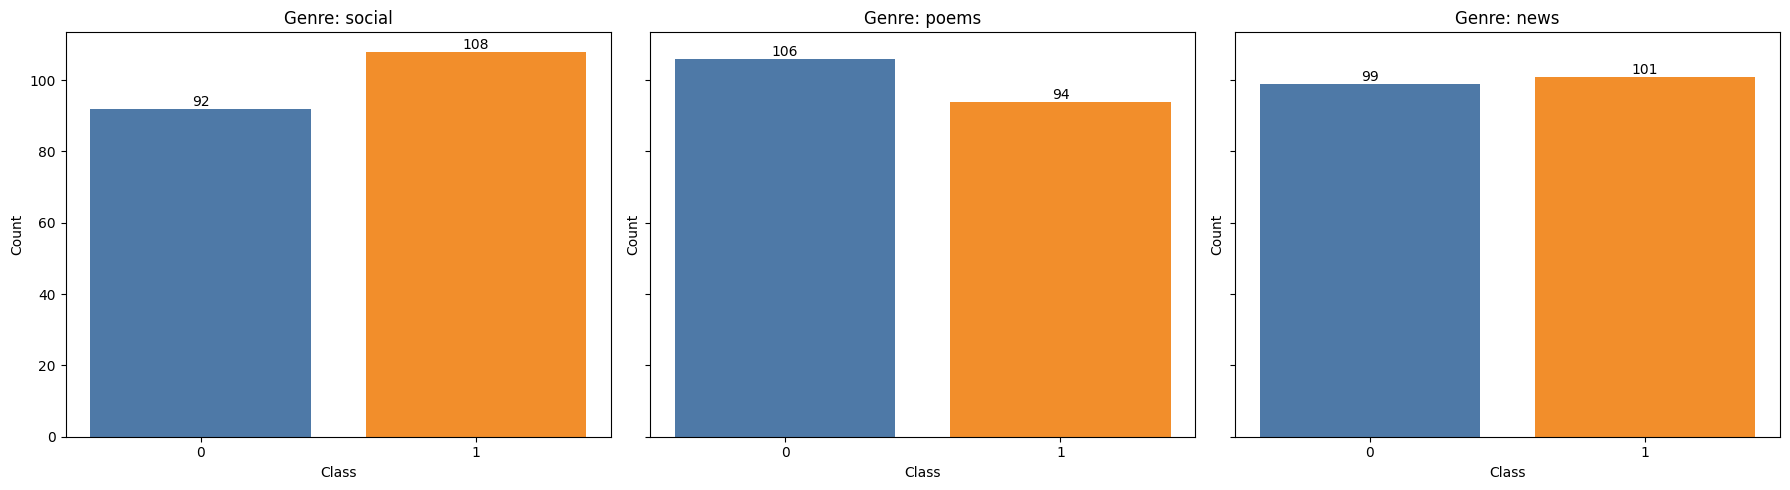

In [ ]:
# Plot Class distribution by genre in the test split
unique_genres = df_test_1['genre'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, genre in zip(axes, unique_genres):
    genre_df = df_test_1[df_test_1['genre'] == genre]

    class_counts = genre_df['class'].value_counts().sort_index()
    class_counts = class_counts.reindex([0, 1], fill_value=0)

    # Plot
    bars = ax.bar(class_counts.index.astype(str),
                  class_counts.values,
                  color=[color_map[c] for c in class_counts.index])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, str(height),
                ha='center', va='bottom')

    ax.set_title(f"Genre: {genre}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

plt.tight_layout()

# Save to file if needed
#plt.savefig("plots/genre_class_distribution_test_1.png", dpi=300, bbox_inches='tight')
plt.show()

Next, we check the word counts distribution and compare it to the distribution in the original human datasets.

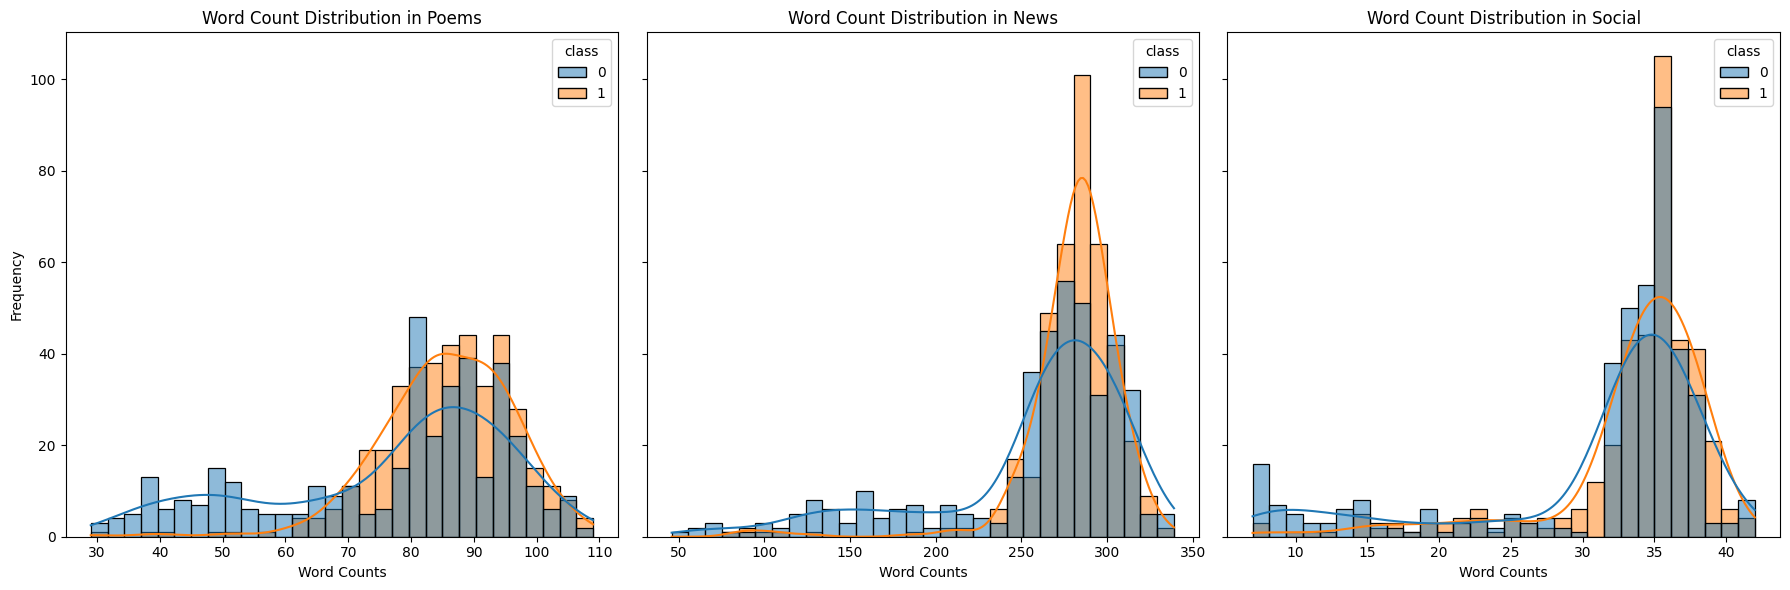

In [ ]:
# Plot word count distribution in the train_split

genres = ["poems", "news", "social"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each genre and create a histogram
for i, genre in enumerate(genres):
    sns.histplot(
        data=df_train[df_train["genre"] == genre],
        x="word_counts",
        hue="class",
        bins=30,
        alpha=0.5,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Word Count Distribution in {genre.capitalize()}")
    axes[i].set_xlabel("Word Counts")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()

# Save to file
#plt.savefig("plots/word_count_distribution_train_split.png", dpi=300, bbox_inches="tight")
plt.show()

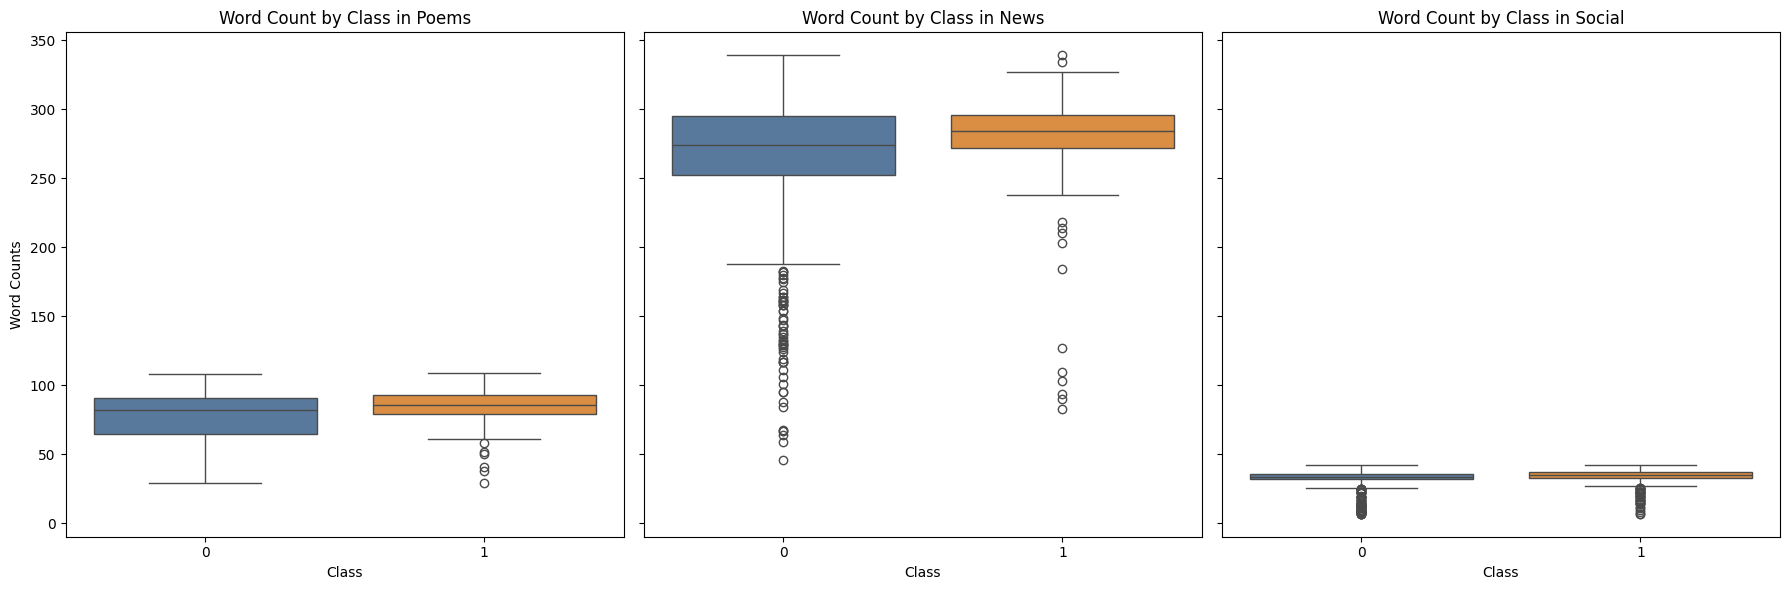

In [ ]:
# Same but boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, genre in enumerate(genres):
    data_genre = df_train[df_train["genre"] == genre]

    sns.boxplot(
        data=data_genre,
        x="class",
        y="word_counts",
        hue="class",
        palette=color_map,
        ax=axes[i],
        dodge=False,
        legend=False
    )

    axes[i].set_title(f"Word Count by Class in {genre.capitalize()}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Word Counts")

plt.tight_layout()

# Save to file
#plt.savefig("plots/word_count_boxplot_train_split.png", dpi=300, bbox_inches="tight")
plt.show()

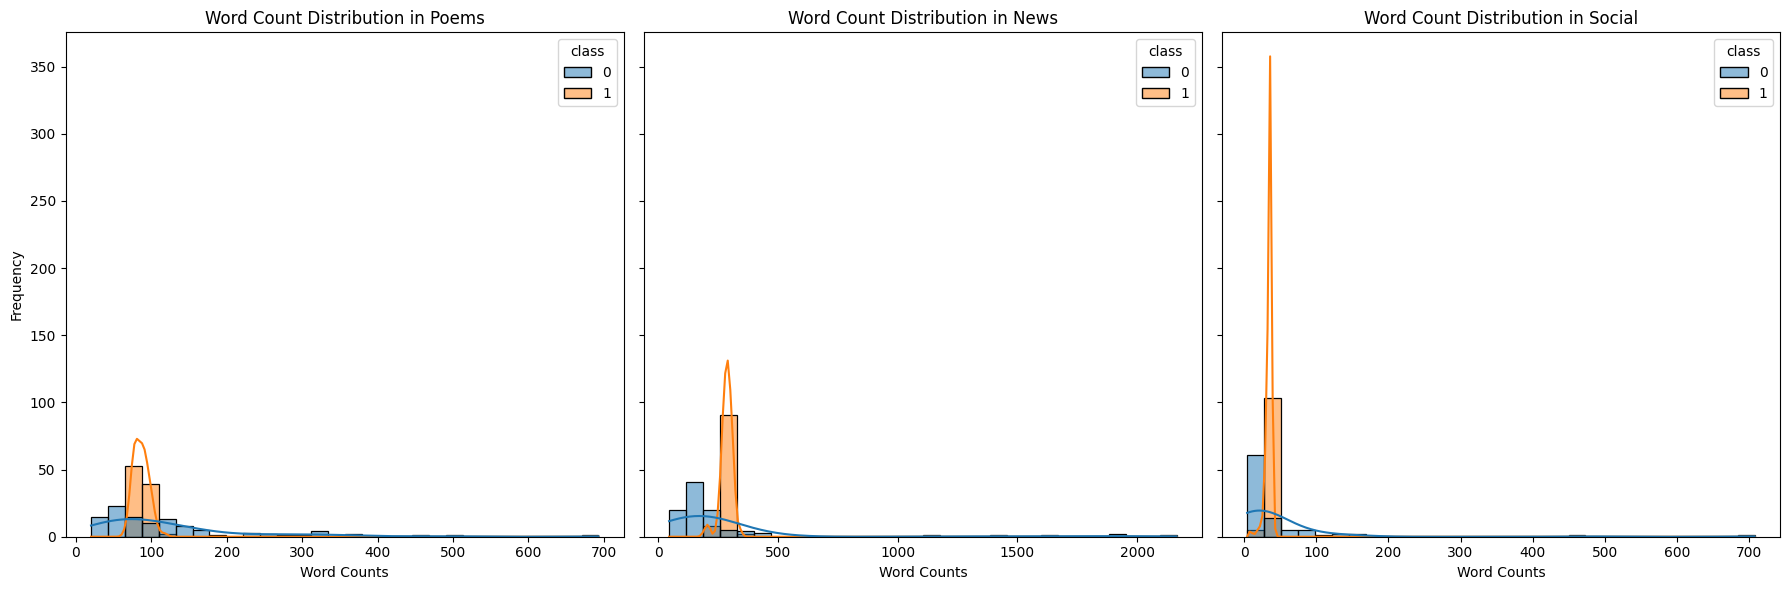

In [ ]:
# Plot word count distribution in the test split
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, genre in enumerate(genres):
    sns.histplot(
        data=df_test_1[df_test_1["genre"] == genre],
        x="word_counts",
        hue="class",
        bins=30,
        alpha=0.5,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f"Word Count Distribution in {genre.capitalize()}")
    axes[i].set_xlabel("Word Counts")
    axes[i].set_ylabel("Frequency")


plt.tight_layout()

# Save to file
#plt.savefig("plots/word_count_distribution_test_split.png", dpi=300, bbox_inches="tight")
plt.show()

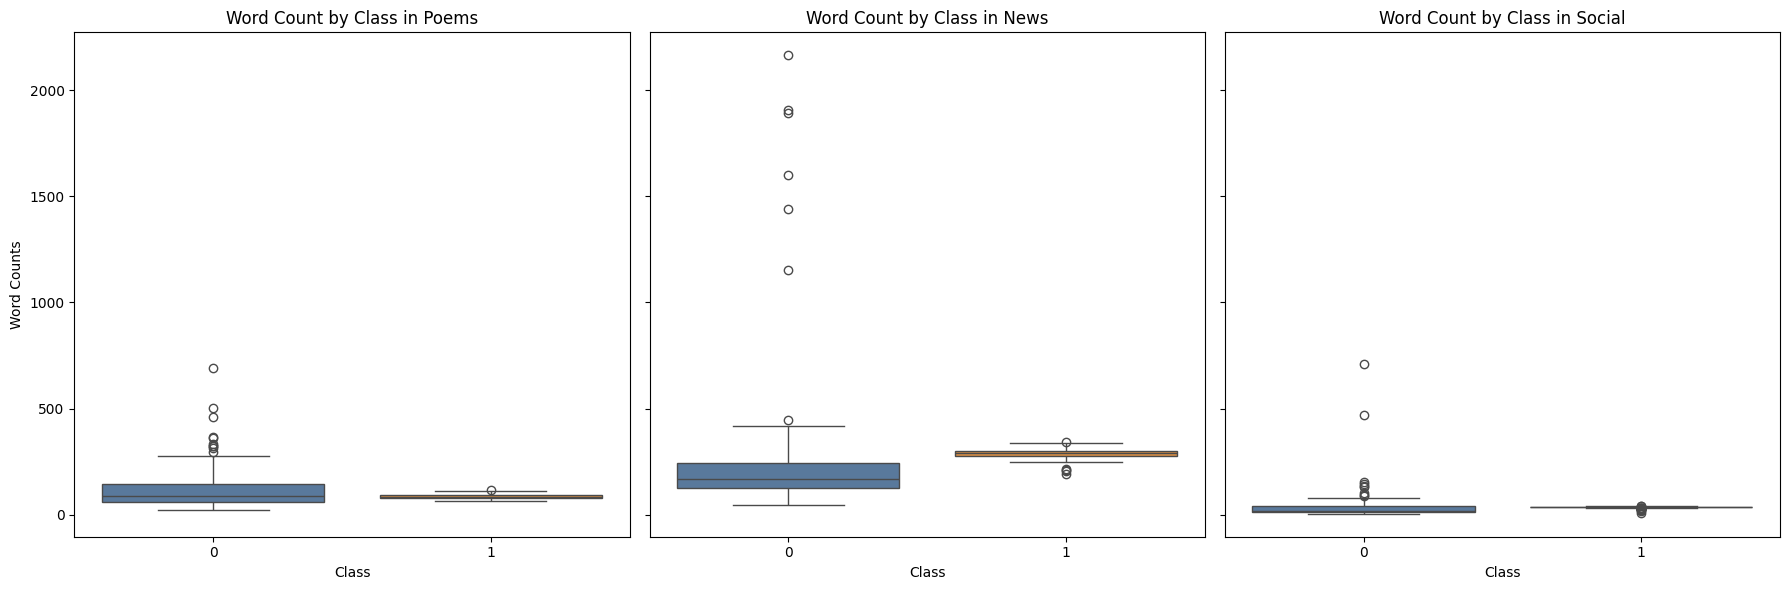

In [ ]:
# Same but boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, genre in enumerate(genres):
    data_genre = df_test_1[df_test_1["genre"] == genre]

    sns.boxplot(
        data=data_genre,
        x="class",
        y="word_counts",
        hue="class",
        palette=color_map,
        ax=axes[i],
        dodge=False,
        legend=False
    )

    axes[i].set_title(f"Word Count by Class in {genre.capitalize()}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Word Counts")

plt.tight_layout()

# Save to file
#plt.savefig("plots/word_count_boxplot_test_split.png", dpi=300, bbox_inches="tight")
plt.show()

Compare the text length distributon in the test split and the original human data sets.

In [ ]:
df_human.sample(5)

,texts,source,word_counts,genre
88803,у меня на стене ссылки на все фото с акции. На...,vk,48,social
586885,"Сам сказал ""не было проблем с женщинами с само...",pikabu,46,social
414798,"Надеюсь, что Советский Нюрнберг будет! И судит...",fb,28,social
5437,"Странно Вы осознаете ,что осуществление постро...",vk,67,social
325066,"Вчера догадался, что празднество без ЛДПР не о...",fb,19,social


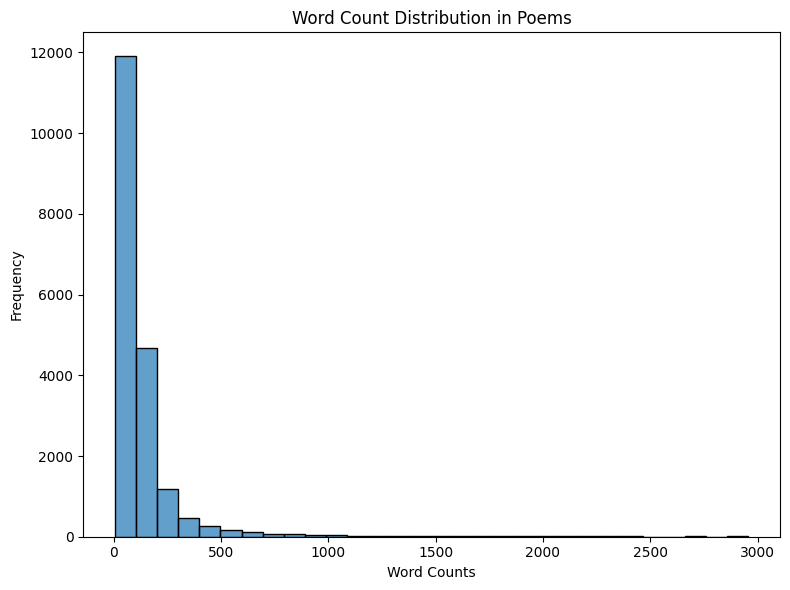

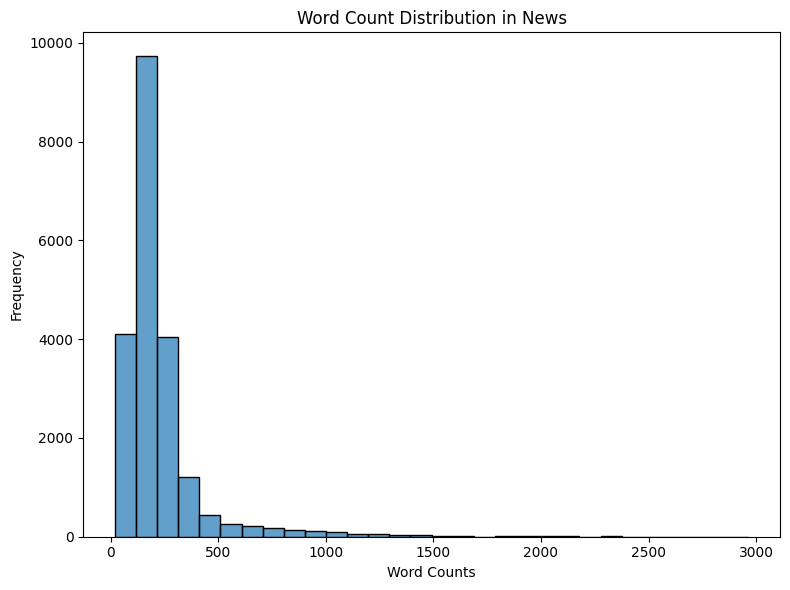

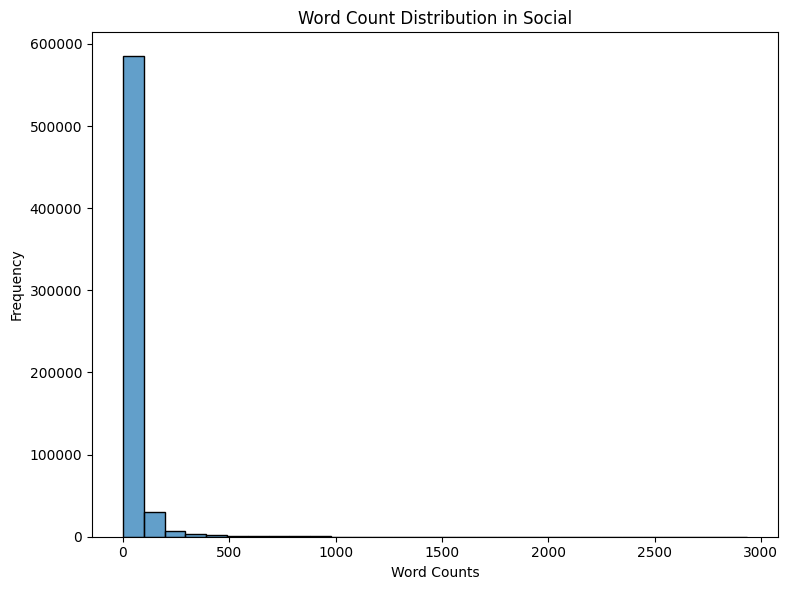

In [ ]:
# Plot word count distribution in human data
for genre in genres:
    # Filter the data
    data_filtered = df_human[(df_human["genre"] == genre) & (df_human["word_counts"] <= 3000)] # remove extreme outliers for better visibility

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.histplot(
        data=data_filtered,
        x="word_counts",
        bins=30,
        alpha=0.7,
        kde=False
    )
    plt.title(f"Word Count Distribution in {genre.capitalize()}")
    plt.xlabel("Word Counts")
    plt.ylabel("Frequency")
    plt.tight_layout()

    # Save plot to file
    #plt.savefig(f"plots/word_count_distribution_human_{genre}.png", dpi=300, bbox_inches="tight")
    plt.show()

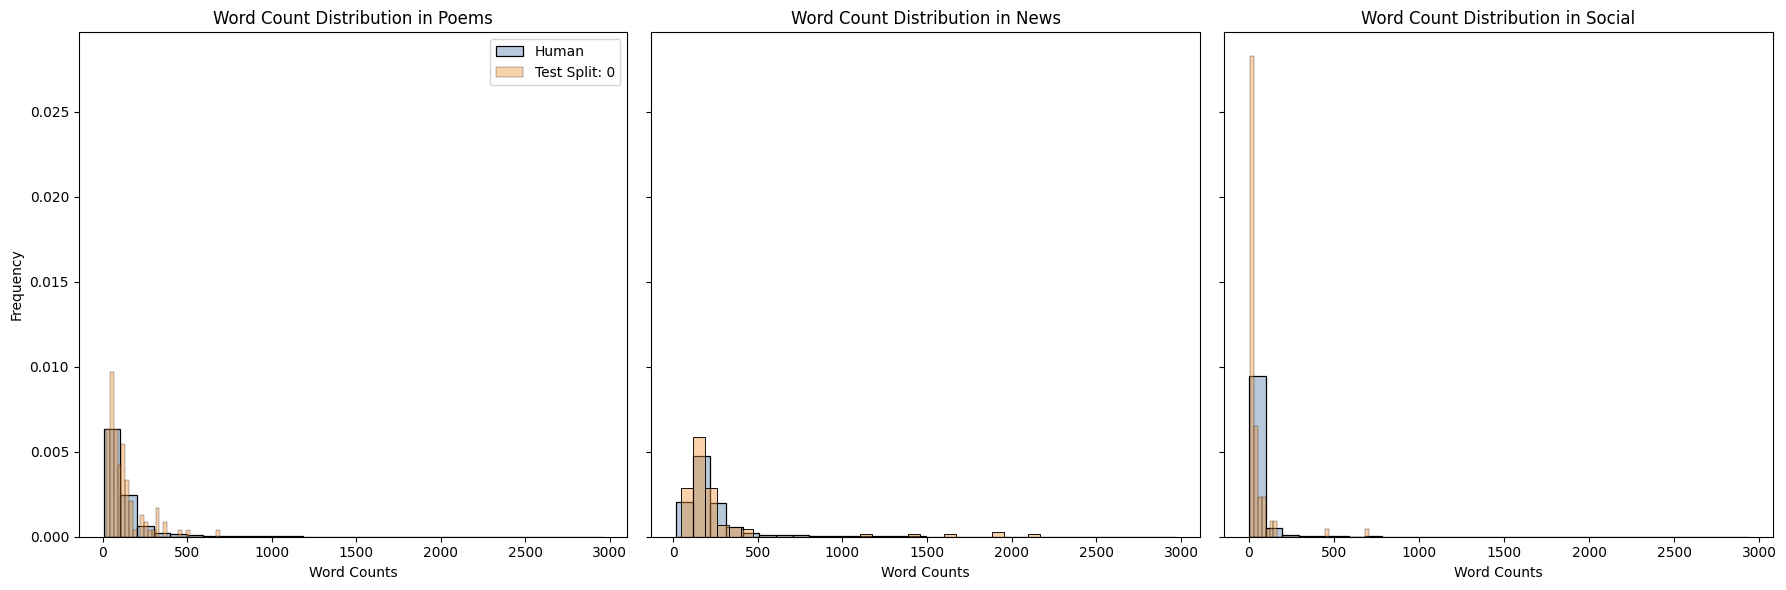

In [ ]:
# Plot word count distribution in the original human data and in the test split (class 0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, genre in enumerate(genres):
    # Filter data and cap word_counts
    data_human = df_human[(df_human["genre"] == genre) & (df_human["word_counts"] <= 3000)] # remove extreme outliers for better visibility
    data_test = df_test_1[
        (df_test_1["genre"] == genre) &
        (df_test_1["class"] == 0) &
        (df_test_1["word_counts"] <= 3000)
    ]

    ax = axes[i]

    # Plot histograms
    sns.histplot(data=data_human, x="word_counts", bins=30, alpha=0.4, color='#4E79A7', label="Human", ax=ax, stat="density")
    sns.histplot(data=data_test, x="word_counts", bins=30, alpha=0.4, color='#F28E2B', label="Test Split: 0", ax=ax, stat="density")


    # Titles and labels
    ax.set_title(f"Word Count Distribution in {genre.capitalize()}")
    ax.set_xlabel("Word Counts")
    ax.set_ylabel("Frequency")

    # Only show legend once
    if i == 0:
        ax.legend()

plt.tight_layout()

# Save to file if needed
#plt.savefig("plots/word_count_distribution_human_vs_test_class0.png", dpi=300, bbox_inches="tight")
plt.show()

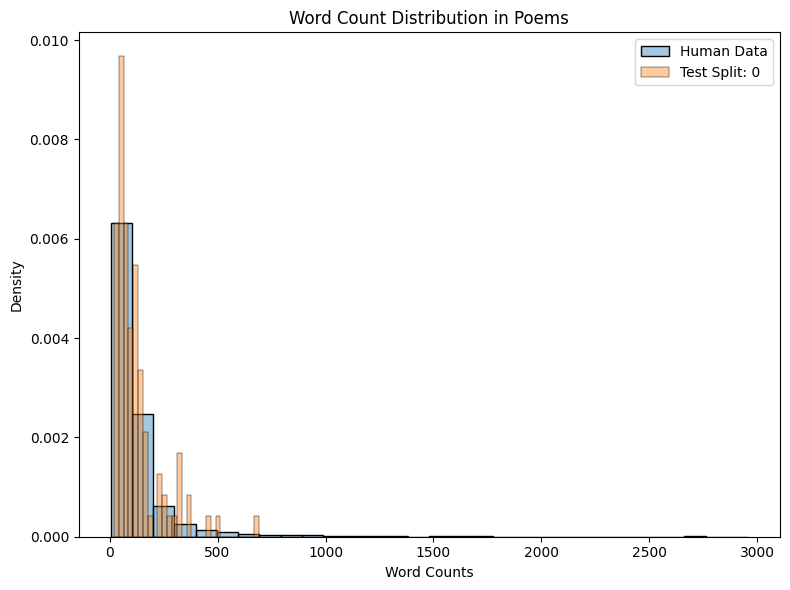

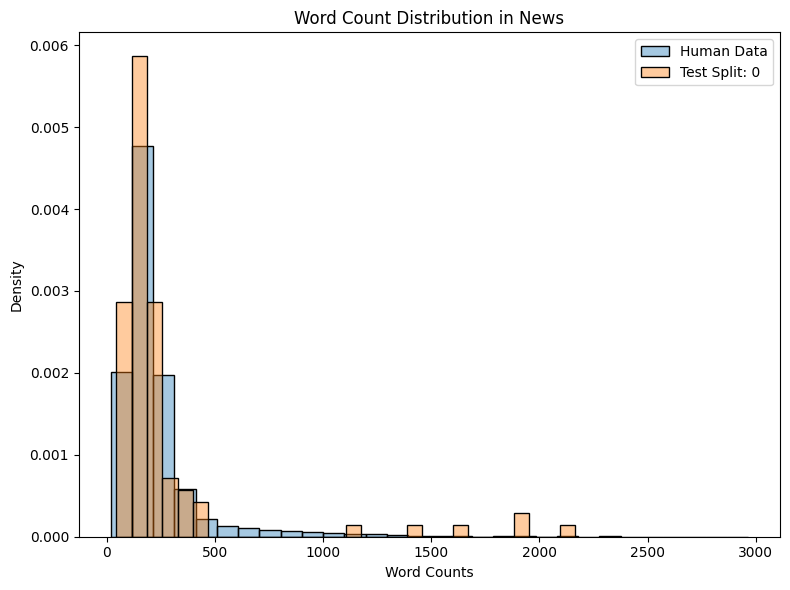

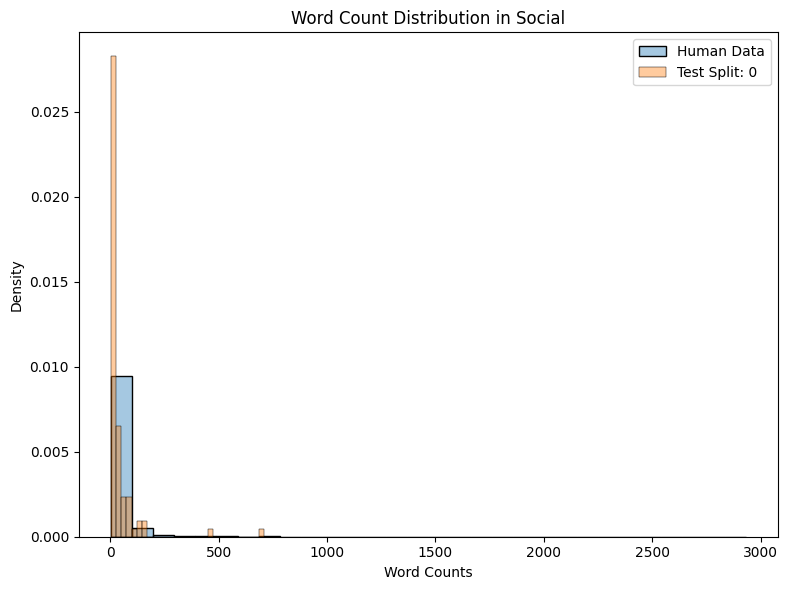

In [ ]:
# The same plots but one by one
for genre in genres:
    # Filter data
    data_human = df_human[(df_human["genre"] == genre) & (df_human["word_counts"] <= 3000)]
    data_test = df_test_1[
        (df_test_1["genre"] == genre) &
        (df_test_1["class"] == 0) &
        (df_test_1["word_counts"] <= 3000)
    ]

    mean_human = data_human["word_counts"].mean()
    mean_test = data_test["word_counts"].mean()

    plt.figure(figsize=(8, 6))

    sns.histplot(data=data_human, x="word_counts", bins=30, alpha=0.4, stat="density", label="Human Data")
    sns.histplot(data=data_test, x="word_counts", bins=30, alpha=0.4, stat="density", label="Test Split: 0")

    plt.title(f"Word Count Distribution in {genre.capitalize()}")
    plt.xlabel("Word Counts")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()

    # Save each genre separately if needed
    #plt.savefig(f"plots/word_count_distribution_{genre}_human_vs_test_class0.png", dpi=300, bbox_inches="tight")
    plt.show()